In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [11]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [12]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [13]:
train_df[['Embarked']].value_counts()

Embarked
S           644
C           168
Q            77
dtype: int64

In [14]:
train_df['Embarked'].fillna('S', inplace=True)

In [15]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [16]:
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

In [17]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [18]:
(177/891)*100

19.865319865319865

In [19]:
train_age = np.random.randint(train_df['Age'].mean()-train_df['Age'].std(), train_df['Age'].mean()+train_df['Age'].std(),177)
train_age

array([40, 30, 33, 27, 17, 32, 20, 34, 31, 36, 28, 32, 15, 40, 15, 42, 17,
       16, 31, 28, 41, 33, 25, 19, 41, 19, 39, 39, 21, 24, 24, 16, 42, 36,
       41, 39, 31, 24, 27, 19, 39, 28, 40, 33, 38, 31, 42, 15, 21, 20, 37,
       16, 35, 31, 38, 27, 43, 22, 21, 41, 26, 29, 38, 18, 38, 24, 35, 27,
       43, 28, 36, 16, 22, 26, 36, 18, 43, 36, 18, 19, 42, 20, 26, 22, 27,
       24, 29, 18, 19, 42, 38, 42, 33, 31, 25, 15, 35, 41, 26, 15, 20, 22,
       42, 35, 31, 43, 29, 38, 25, 33, 28, 16, 22, 40, 26, 31, 23, 26, 27,
       37, 30, 18, 28, 34, 25, 38, 31, 28, 24, 31, 29, 17, 31, 40, 40, 38,
       33, 19, 25, 40, 37, 43, 35, 16, 21, 42, 16, 35, 41, 32, 27, 35, 27,
       31, 22, 25, 19, 42, 28, 28, 39, 41, 25, 37, 28, 26, 28, 33, 22, 19,
       38, 20, 18, 34, 33, 23, 22])

In [20]:
test_age = np.random.randint(test_df['Age'].mean()-test_df['Age'].std(), test_df['Age'].mean()+test_df['Age'].std(),86)
test_age

array([36, 25, 26, 17, 16, 25, 26, 42, 36, 26, 16, 33, 20, 32, 20, 27, 41,
       32, 16, 29, 27, 36, 27, 34, 25, 36, 17, 19, 35, 29, 26, 25, 37, 29,
       41, 29, 37, 21, 35, 31, 24, 41, 28, 23, 30, 39, 42, 24, 38, 34, 17,
       34, 24, 39, 36, 20, 35, 29, 43, 17, 38, 23, 22, 30, 36, 39, 40, 29,
       22, 32, 22, 28, 17, 36, 23, 16, 29, 31, 42, 40, 23, 21, 21, 28, 40,
       25])

In [21]:
train_df['Age'][train_df['Age'].isnull()] = train_age

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4660\750381592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Age'][train_df['Age'].isnull()] = train_age


In [22]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
test_df['Age'][test_df['Age'].isnull()]=test_age

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4660\3597381426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Age'][test_df['Age'].isnull()]=test_age


In [24]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
#EDA Exploratory Data Analysis
train_df[train_df['Pclass']==1]['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [26]:
train_df[train_df['Pclass']==2]["Survived"].value_counts()

0    97
1    87
Name: Survived, dtype: int64

In [27]:
train_df[train_df['Pclass']==3]["Survived"].value_counts()

0    372
1    119
Name: Survived, dtype: int64

In [28]:
train_df.groupby(['Pclass'])['Survived'].mean()
#Therefore we cannot drop Pclass column as their exist a co- relation between them

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [29]:
train_df.groupby(['Name'])['Survived'].mean()

Name
Abbing, Mr. Anthony                      0.0
Abbott, Mr. Rossmore Edward              0.0
Abbott, Mrs. Stanton (Rosa Hunt)         1.0
Abelson, Mr. Samuel                      0.0
Abelson, Mrs. Samuel (Hannah Wizosky)    1.0
                                        ... 
de Mulder, Mr. Theodore                  1.0
de Pelsmaeker, Mr. Alfons                0.0
del Carlo, Mr. Sebastiano                0.0
van Billiard, Mr. Austin Blyler          0.0
van Melkebeke, Mr. Philemon              0.0
Name: Survived, Length: 891, dtype: float64

In [30]:
train_df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [31]:
train_df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

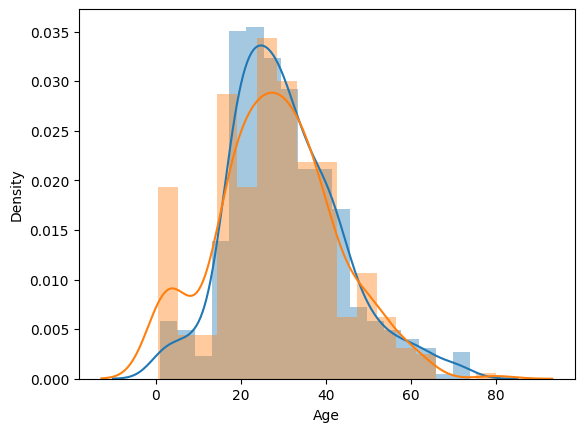

In [32]:
sns.distplot(train_df['Age'][train_df['Survived']==0])
sns.distplot(train_df['Age'][train_df['Survived']==1])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

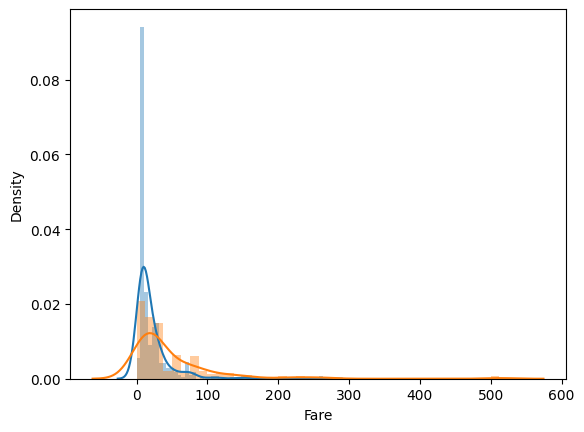

In [33]:
sns.distplot(train_df['Fare'][train_df['Survived']==0])
sns.distplot(train_df['Fare'][train_df['Survived']==1])

In [34]:
train_df.drop(columns='Ticket', inplace=True)
test_df.drop(columns='Ticket', inplace=True)

In [35]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [36]:
train_df['Family']=train_df['SibSp'] + train_df['Parch'] + 1

In [37]:
test_df['Family']=test_df['SibSp'] + test_df['Parch'] + 1

In [38]:
train_df['Family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [39]:
test_df['Family'].value_counts()

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: Family, dtype: int64

In [40]:
train_df.groupby(['Family'])['Survived'].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [41]:
def cal(number):
    if number == 1:
        return "Alone"
    elif number > 1 and number < 5:
        return "Medium"
    else:
        return "Large"

In [42]:
train_df['family_size'] = train_df['Family'].apply(cal)

In [43]:
test_df['family_size'] = test_df['Family'].apply(cal)

In [44]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium


In [45]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,Medium


In [46]:
train_df.drop(columns=['SibSp','Parch','Family'], inplace=True)
test_df.drop(columns=['SibSp','Parch','Family'], inplace=True)

In [47]:
print(train_df.shape)
print(test_df.shape)

(891, 9)
(418, 8)


In [48]:
passengerId = test_df['PassengerId'].values
passengerId

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [49]:
train_df.drop(columns=['Name', 'PassengerId'], inplace=True)
test_df.drop(columns=['Name', 'PassengerId'], inplace=True)

In [50]:
train_df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [51]:
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,male,22.0,7.2500,S,Medium
1,1,1,female,38.0,71.2833,C,Medium
2,1,3,female,26.0,7.9250,S,Alone
3,1,1,female,35.0,53.1000,S,Medium
4,0,3,male,35.0,8.0500,S,Alone
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Alone
887,1,1,female,19.0,30.0000,S,Alone
888,0,3,female,22.0,23.4500,S,Medium
889,1,1,male,26.0,30.0000,C,Alone


In [52]:
train_df = pd.get_dummies(train_df, columns=['Pclass', 'Sex', 'Embarked', 'family_size'], drop_first=True)
train_df

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
0,0,22.0,7.2500,0,1,1,0,1,0,1
1,1,38.0,71.2833,0,0,0,0,0,0,1
2,1,26.0,7.9250,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,0,0,0,1,0,1
4,0,35.0,8.0500,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0,1,0,1,0,0
887,1,19.0,30.0000,0,0,0,0,1,0,0
888,0,22.0,23.4500,0,1,0,0,1,0,1
889,1,26.0,30.0000,0,0,1,0,0,0,0


In [53]:
train_df.shape

(891, 10)

In [54]:
test_df = pd.get_dummies(test_df, columns=['Pclass', 'Sex', 'Embarked', 'family_size'], drop_first=True)
test_df

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
0,34.5,7.8292,0,1,1,1,0,0,0
1,47.0,7.0000,0,1,0,0,1,0,1
2,62.0,9.6875,1,0,1,1,0,0,0
3,27.0,8.6625,0,1,1,0,1,0,0
4,22.0,12.2875,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
413,28.0,8.0500,0,1,1,0,1,0,0
414,39.0,108.9000,0,0,0,0,0,0,0
415,38.5,7.2500,0,1,1,0,1,0,0
416,40.0,8.0500,0,1,1,0,1,0,0


In [55]:
train_df.drop(columns=['Fare'],inplace=True)
test_df.drop(columns=['Fare'],inplace=True)

In [56]:
X = train_df.iloc[:, 1:].values
y = train_df.iloc[:, 0].values

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

In [58]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [59]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
y_pred = classifier.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.776536312849162

In [62]:
Xf = test_df.iloc[:,:].values
Xf

array([[34.5,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [47. ,  0. ,  1. , ...,  1. ,  0. ,  1. ],
       [62. ,  1. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [38.5,  0. ,  1. , ...,  1. ,  0. ,  0. ],
       [40. ,  0. ,  1. , ...,  1. ,  0. ,  0. ],
       [25. ,  0. ,  1. , ...,  0. ,  0. ,  1. ]])

In [63]:
y_final = classifier.predict(Xf)

In [64]:
passengerId.shape

(418,)

In [65]:
y_final.shape

(418,)

In [66]:
final = pd.DataFrame()
final

""


In [67]:
final['PassengerId']=passengerId
final['Survived'] = y_final

In [68]:
final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [69]:
final['Survived'].value_counts()

0    271
1    147
Name: Survived, dtype: int64

In [70]:
final.to_csv('output.csv',index=False)